In [94]:
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Blurred Image')

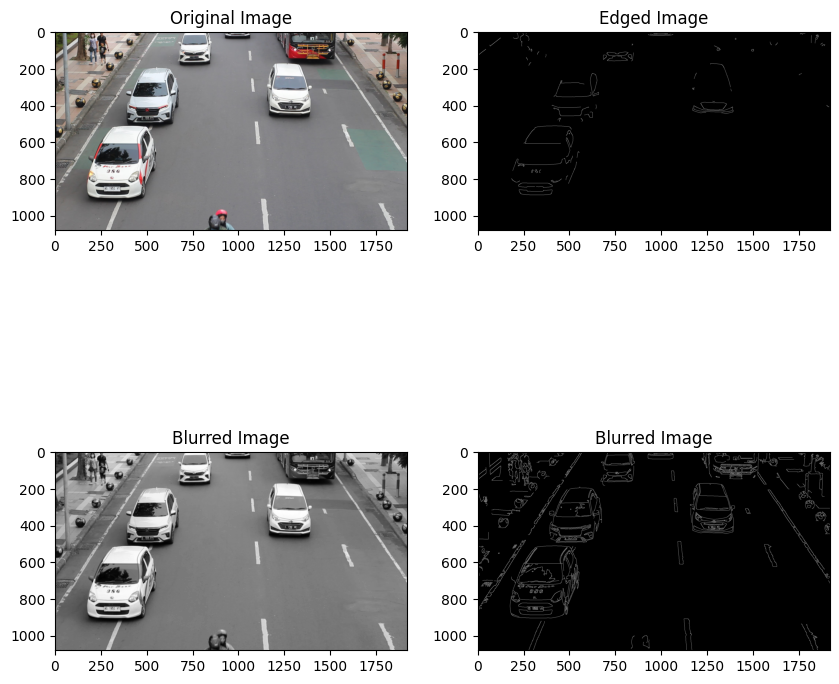

In [95]:
# load image
img = cv2.imread("output1/frame660.jpg")

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply Gaussian blur
blur = cv2.GaussianBlur(gray, (5,5), 0)

# detect edges using Canny edge detection
edges = cv2.Canny(blur, 500, 270)
edges1 = cv2.Canny(blur, 100, 270)
# find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0][0].set_title('Original Image')
axs[0][1].imshow(edges, cmap='gray')
axs[0][1].set_title('Edged Image')
axs[1][0].imshow(blur, cmap='gray')
axs[1][0].set_title('Blurred Image')
axs[1][1].imshow(edges1, cmap='gray')
axs[1][1].set_title('Blurred Image')


In [96]:
# loop over contours and draw rectangles around license plates
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 200:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

Text(0.5, 1.0, 'Cropped Image')

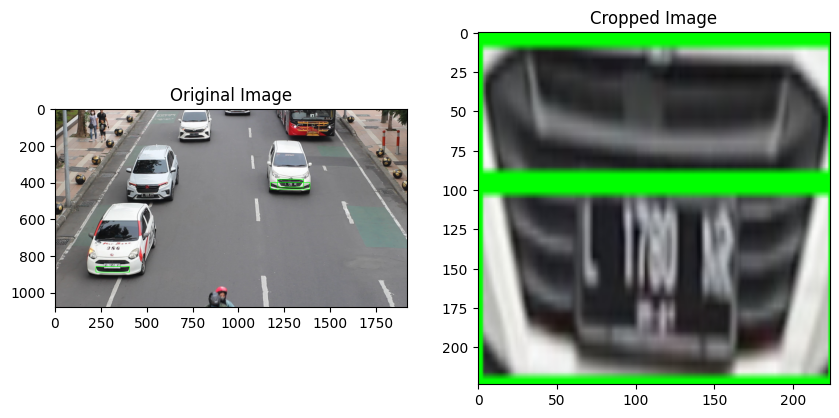

In [97]:
# display result
# cv2.imshow("License Plate Detection", img)
cropped = cv2.resize(img[y:y+h, x:x+w], (224, 224))
# plt.imshow(img)
# plt.show("License Plate Detection", img)
# plt.show(cropped)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
axs[1].set_title('Cropped Image')
